In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
df = pd.read_csv('BankData.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
# Hay demasiados existing customer, entonces seguramente se va a predecir mejor ese si usamos la data desbalanceada
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

# Analisis de datos

In [4]:
def plotColumns_vrs_Target(df, colname, target):
    plt.figure(figsize=(10,5))
    plot = sns.countplot(x=df[colname], hue=df[target])
    # Esto es solo para poner los numeros en el centro y justo arriba
    for p in plot.patches:
        # Esto es solo para poner los numeros en el centro y justo arriba
        plot.annotate(p.get_height(), (p.get_x() + p.get_width()/3, p.get_height() + 50))

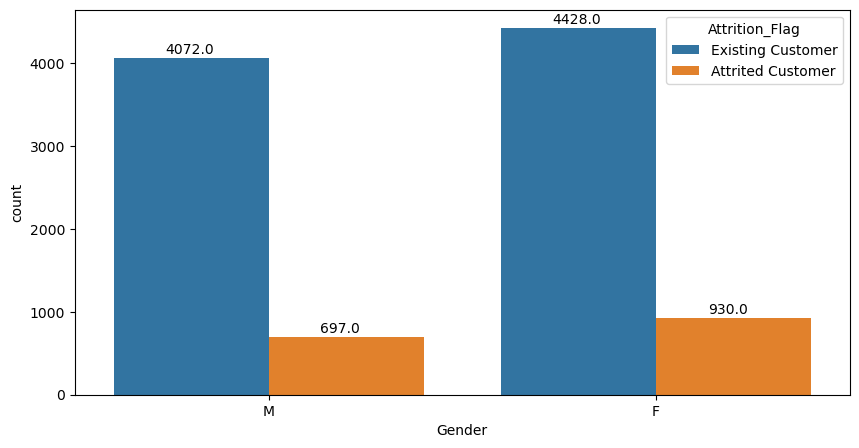

In [5]:
plotColumns_vrs_Target(df, 'Gender', "Attrition_Flag")

In [6]:
categorical = []
discrete = []
continues = []
explicatory_vars = list(df.columns)
explicatory_vars.remove("CLIENTNUM")
explicatory_vars.remove("Attrition_Flag")
explicatory_vars
for colName in explicatory_vars:
    if(df[colName].dtype == 'object'):
        categorical.append(colName)
    else:
        if ((df[colName].dtype in ['int64', 'float64']) and len(df[colName].unique()) <= 30):
            discrete.append(colName)
        else:
            continues.append(colName)
        
categorical_and_discrete  =     categorical + discrete

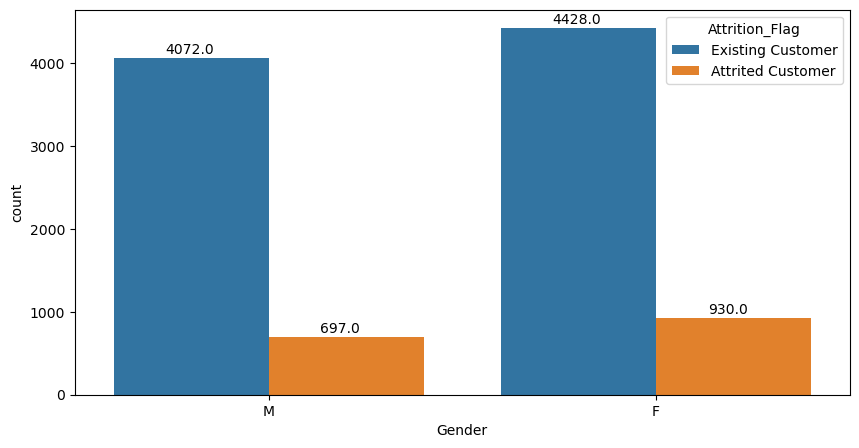

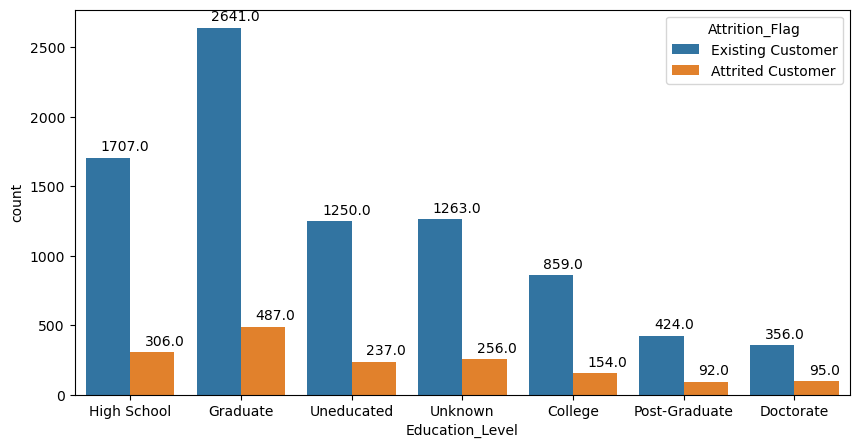

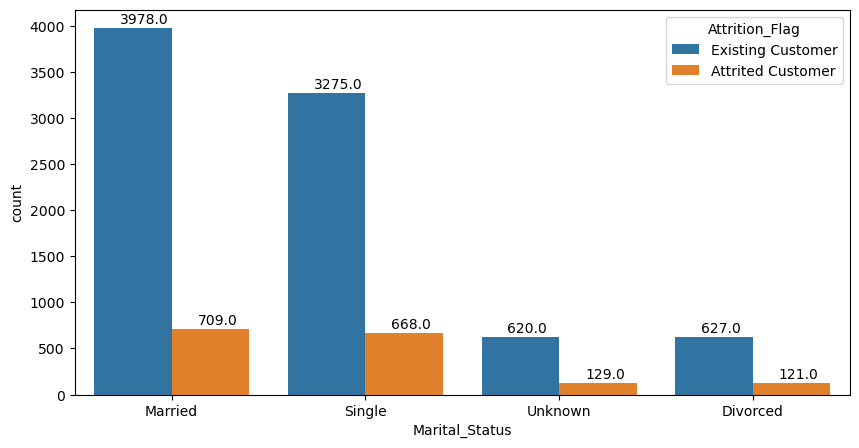

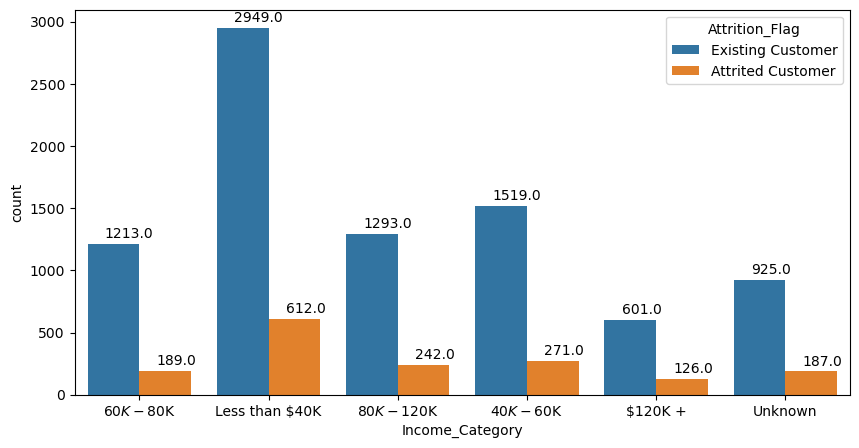

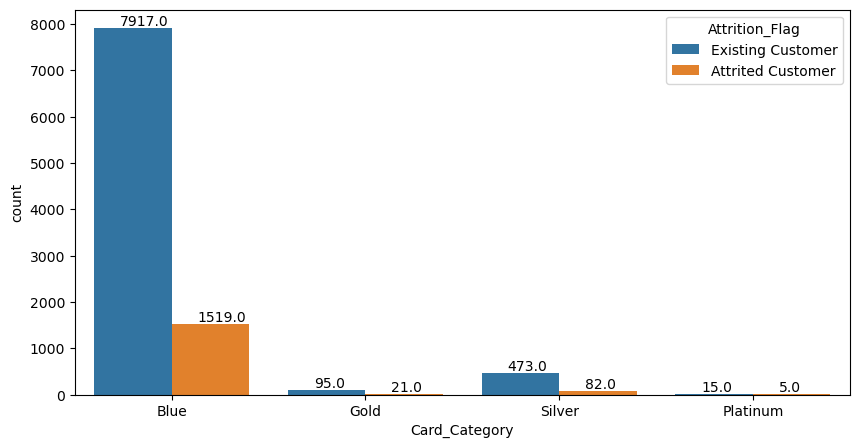

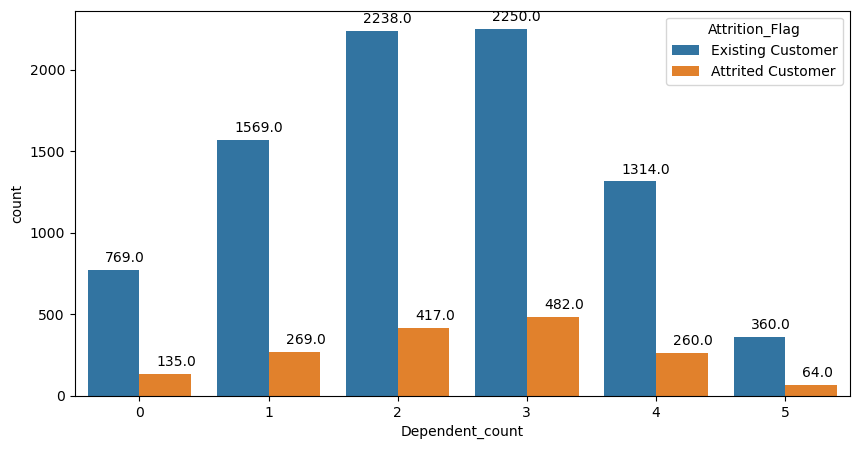

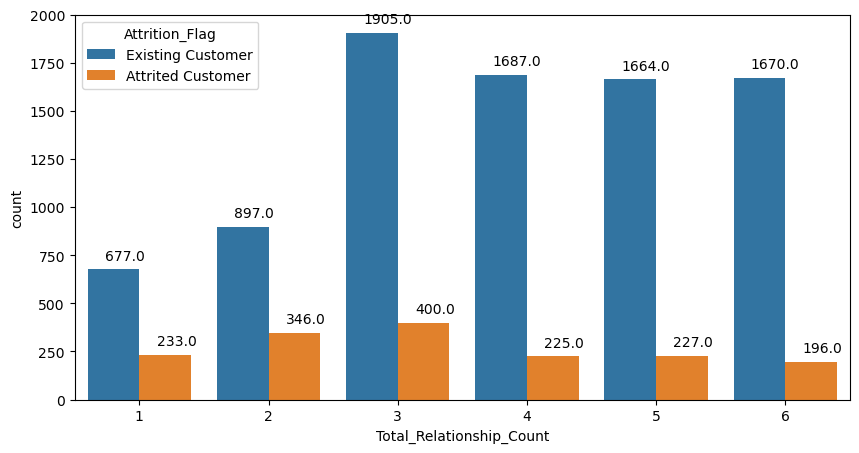

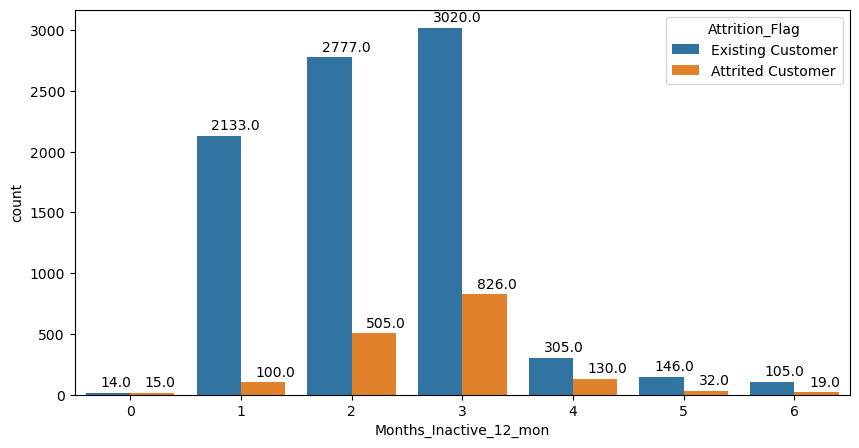

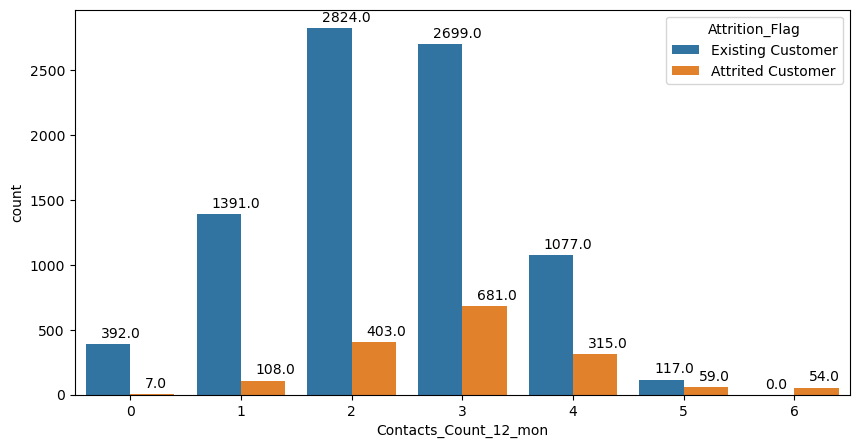

In [7]:
for colName in categorical_and_discrete:
    plotColumns_vrs_Target(df, colName, "Attrition_Flag")

In [8]:
continues

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

## BoxPlots para variables continuas


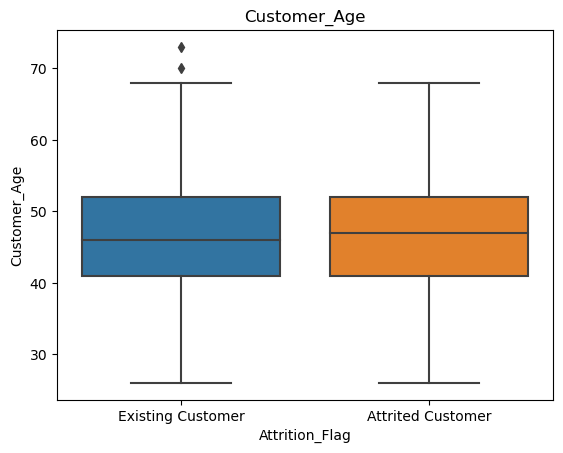

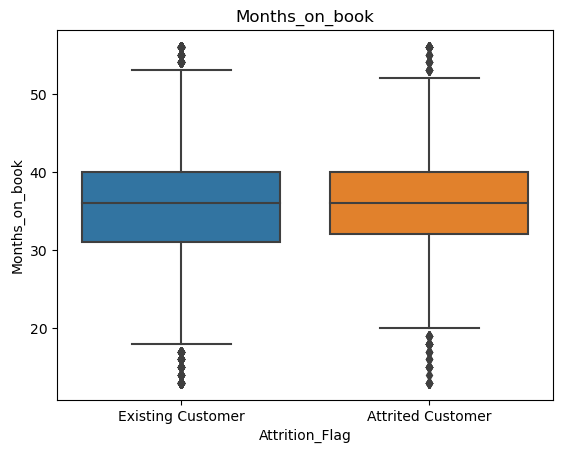

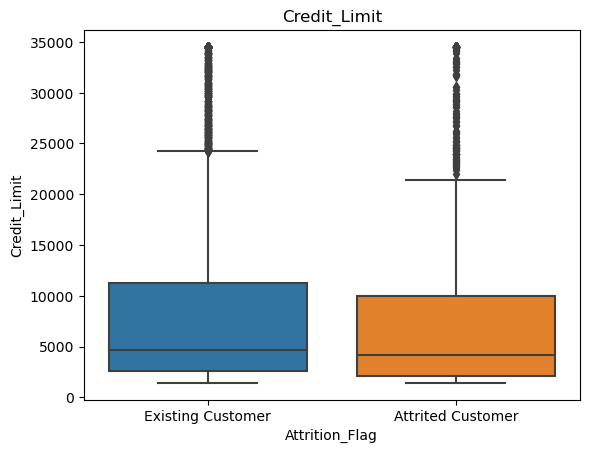

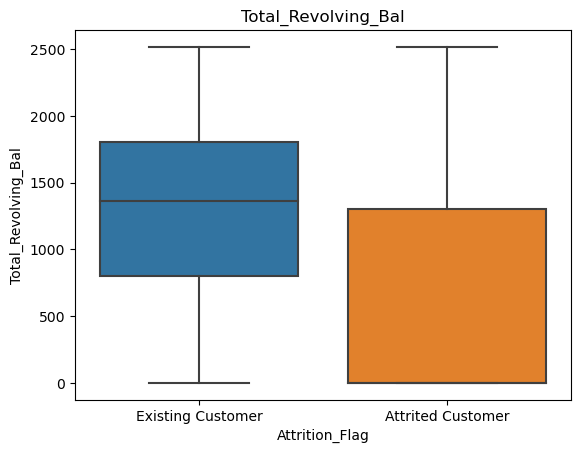

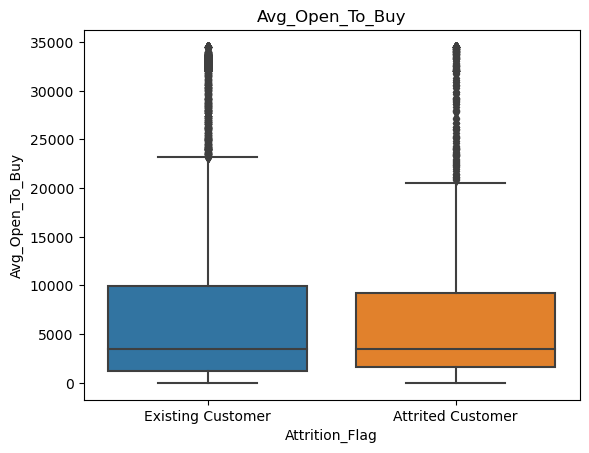

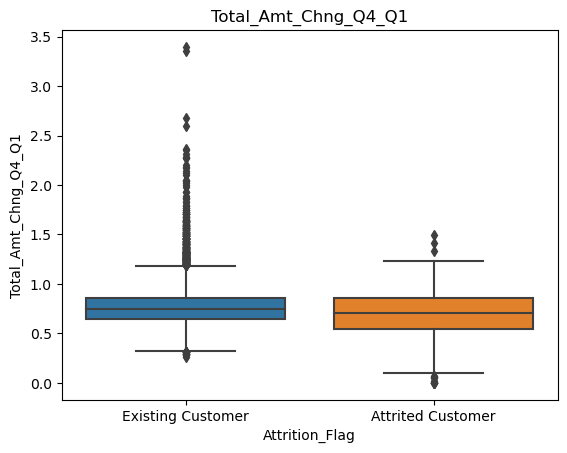

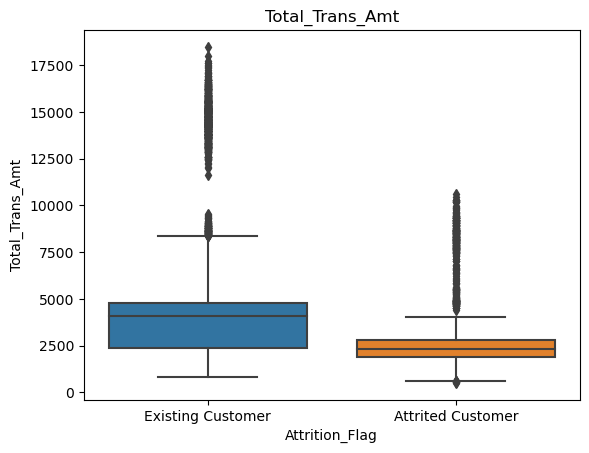

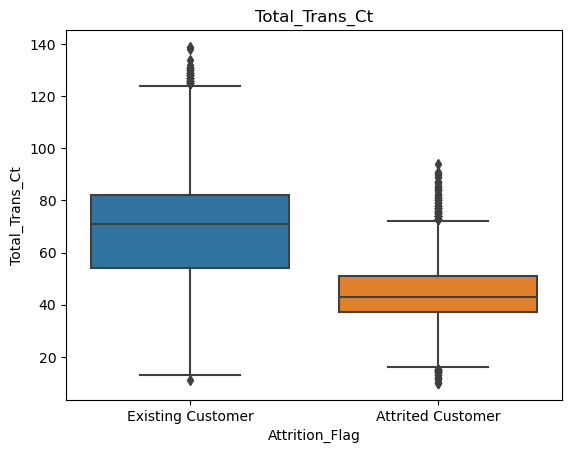

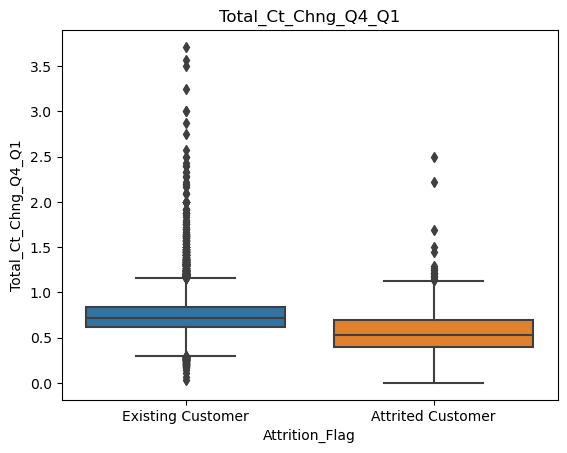

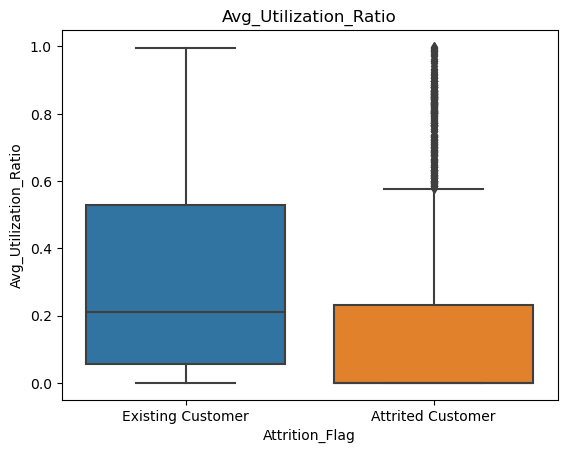

In [9]:
for colName in continues:
        sns.boxplot(x=df["Attrition_Flag"], y=df[colName])
        plt.title(colName)
        plt.show()

# Feature Engineering

## Balanceo de datos

In [10]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [11]:
df_attrited= df[df['Attrition_Flag'] == "Attrited Customer"]
df_existing= df[df['Attrition_Flag'] == "Existing Customer"]

In [12]:
cantidadExisting = 2*df_attrited.shape[0]
cantidadExisting

3254

In [13]:
df_existing = df_existing.sample(n=cantidadExisting, random_state=2023)

In [14]:
df = pd.concat([df_existing, df_attrited])
df.shape

(4881, 21)

## Ingenieria de Caracteristicas

In [15]:
df.isnull().mean()

CLIENTNUM                   0.0
Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

## Codificacion de variables categoricas

In [16]:
df['Gender'].value_counts()

F    2604
M    2277
Name: Gender, dtype: int64

In [17]:
ohe_gender = pd.get_dummies(df['Gender'], drop_first=True)
df['Gender'] = ohe_gender
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3122,754599558,Existing Customer,40,0,3,College,Single,Less than $40K,Blue,33,...,3,1,7207.0,2002,5205.0,0.828,3825,70,0.707,0.278
636,713580633,Existing Customer,46,1,3,Graduate,Married,$40K - $60K,Blue,32,...,2,3,11477.0,0,11477.0,0.767,1260,27,0.688,0.000
8964,788327358,Existing Customer,61,1,1,Graduate,Single,Unknown,Blue,54,...,1,3,9070.0,2097,6973.0,0.801,8440,102,0.700,0.231
8919,825767658,Existing Customer,49,1,2,Graduate,Single,$60K - $80K,Gold,45,...,3,1,34516.0,913,33603.0,0.698,7711,80,0.860,0.026
4354,767354208,Existing Customer,48,1,4,Graduate,Married,$80K - $120K,Blue,41,...,2,1,14322.0,0,14322.0,0.602,3993,75,0.531,0.000


In [18]:
for colName in categorical:
    dict_for_encode= df[colName].value_counts().to_dict()
    df[colName] = df[colName].map(dict_for_encode)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3122,754599558,Existing Customer,40,2604,3,484,1943,1713,4548,33,...,3,1,7207.0,2002,5205.0,0.828,3825,70,0.707,0.278
636,713580633,Existing Customer,46,2277,3,1498,2208,864,4548,32,...,2,3,11477.0,0,11477.0,0.767,1260,27,0.688,0.000
8964,788327358,Existing Customer,61,2277,1,1498,1943,540,4548,54,...,1,3,9070.0,2097,6973.0,0.801,8440,102,0.700,0.231
8919,825767658,Existing Customer,49,2277,2,1498,1943,646,59,45,...,3,1,34516.0,913,33603.0,0.698,7711,80,0.860,0.026
4354,767354208,Existing Customer,48,2277,4,1498,2208,749,4548,41,...,2,1,14322.0,0,14322.0,0.602,3993,75,0.531,0.000


In [19]:
df['Attrition_Flag'] = pd.get_dummies(df['Attrition_Flag'], drop_first=True)

In [20]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3122,754599558,1,40,2604,3,484,1943,1713,4548,33,...,3,1,7207.0,2002,5205.0,0.828,3825,70,0.707,0.278
636,713580633,1,46,2277,3,1498,2208,864,4548,32,...,2,3,11477.0,0,11477.0,0.767,1260,27,0.688,0.000
8964,788327358,1,61,2277,1,1498,1943,540,4548,54,...,1,3,9070.0,2097,6973.0,0.801,8440,102,0.700,0.231
8919,825767658,1,49,2277,2,1498,1943,646,59,45,...,3,1,34516.0,913,33603.0,0.698,7711,80,0.860,0.026
4354,767354208,1,48,2277,4,1498,2208,749,4548,41,...,2,1,14322.0,0,14322.0,0.602,3993,75,0.531,0.000


# Creacion de modelos

## Split Data

In [21]:
X = df.drop(['Attrition_Flag', 'CLIENTNUM'], axis=1)
y=df['Attrition_Flag']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2023)

In [23]:
scaler =  StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## SVM

In [31]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_std, y_train)

#Predict the response for test dataset
svm_predicted = clf.predict(X_test_std)

print(f"Accuracy: {round(accuracy_score(y_test, svm_predicted), 4)}")
print(f"ROC-AUC: {round(roc_auc_score(y_test, svm_predicted), 4)}")

Accuracy: 0.8519
ROC-AUC: 0.8256


## K-nearest neighbors

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)
# Predict Output
knn_predicted = knn.predict(X_test_std)

print(f"Accuracy: {round(accuracy_score(y_test, knn_predicted), 4)}")
print(f"ROC-AUC: {round(roc_auc_score(y_test, knn_predicted), 4)}")

Accuracy: 0.843
ROC-AUC: 0.8107


## Naive Bayes

In [24]:


# Build a Gaussian Classifier
nb = GaussianNB()

# Model training
nb.fit(X_train_std, y_train)

# Predict Output
nb_predicted = nb.predict(X_test_std)

print(f"Accuracy: {round(accuracy_score(y_test, nb_predicted), 4)}")
print(f"ROC-AUC: {round(roc_auc_score(y_test, nb_predicted), 4)}")

Accuracy: 0.8034
ROC-AUC: 0.7869


## Linear Discriminant Analysis

In [37]:
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_std, y_train)
lda_predicted  = lda.predict(X_test_std)
print(f"Accuracy: {round(accuracy_score(y_test, lda_predicted), 4)}")
print(f"ROC-AUC: {round(roc_auc_score(y_test, lda_predicted), 4)}")

Accuracy: 0.8553
ROC-AUC: 0.8282


## Quadratic Discriminant Analysis

In [38]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_std, y_train)
qda_predicted  = qda.predict(X_test_std)
print(f"Accuracy: {round(accuracy_score(y_test, qda_predicted), 4)}")
print(f"ROC-AUC: {round(roc_auc_score(y_test, qda_predicted), 4)}")

Accuracy: 0.6983
ROC-AUC: 0.7319


C:\ProgramData\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
